# Задания для самостоятельного решения


### 1. Найдите минимально необходимый объем выборки для построения интервальной оценки среднего с точностью ∆ = 3, дисперсией σ^2 = 225 и уровнем доверия β = 0.95.

In [3]:
import numpy as np
sigma = np.sqrt(225)  # Стандартное отклонение
z = 1.96  # Квантиль нормального распределения для β = 0.95
delta = 3 #Погрешность

n = ((sigma*z)/delta)**2
print(f'Минимальный объем выборки: {n}')

Минимальный объем выборки: 96.03999999999998


### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

In [84]:
import scipy.stats as stats

population_men = stats.norm.rvs(loc=19,scale=171,size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=16,scale=165,size=12000)  # Выборка женщин со средним ростом 165

t, p  = stats.ttest_ind(population_men,population_women)


print('t=%.3f, p=%.3f' % (t, p))
if p < 0.001:
    print('Различия существенны')
else:
    print('Различия несущественны')

t=0.782, p=0.434
Различия несущественны


P-value (0.434) значительно превышает заданный уровень значимости, следовательно мы не можем отвергнуть нулевую гипотезу. Различие между выборками нельзя считать значительным.

### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

In [6]:
sigma = 150  # Стандартное отклонение
z = 1.96  # Квантиль нормального распределения для β = 0.95
delta = 50 #Погрешность

n = ((sigma*z)/delta)**2
print(f'Минимальный объем выборки: {n}')

Минимальный объем выборки: 34.5744


### 4.  Представьте, что вы хотите разоблачить "волшебника", который считает, что умеет предсказывать погоду на завтра. Отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого периода времени и получили такие результаты (см.ниже). Можно ли сказать, что маг действительно умеет предсказывать погоду, если уровнь значимости принять за 0.05 ?

In [8]:
import pandas as pd
observations = pd.DataFrame([[14,36],[15,45]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,14,36
Солнце,15,45


In [81]:
import scipy as sp
t, p = sp.stats.fisher_exact(observations)  # Возможно вам пригодится эта функция.

print('t=%.3f, p=%.3f' % (t, p))
if p < 0.05:
    print('Различия существенны')
else:
    print('Различия несущественны')

t=1.167, p=0.829
Различия несущественны


P-value значительно превышает уровень значимости. Различия между выборками нельзя считать существенными. У нас нет оснований называть волшебника шарлатаном.

### 5. Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия 90% для выборки: 
data = [1,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5]


In [67]:
def mean_confidence_interval(data, confidence):
    n = len(data)
    m, se = np.mean(data), sp.stats.sem(data)
    h = se * sp.stats.t.ppf((1 + confidence)/2, n)
    return m-h,m, m+h

In [80]:
data = [1,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5]

l,s,r = mean_confidence_interval(data, 0.90)
print(f'Доверительный интервал: {l,r}')

Доверительный интервал: (5.843062450077532, 7.039290491098939)


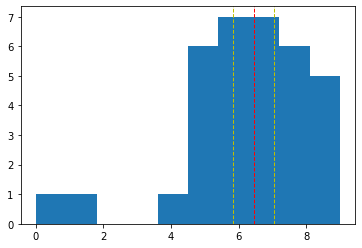

In [69]:
import matplotlib.pyplot as plt
plt.hist(data)
plt.axvline(s, color='r', linestyle='dashed', linewidth=1)
plt.axvline(r, color='y', linestyle='dashed', linewidth=1)
plt.axvline(l, color='y', linestyle='dashed', linewidth=1)

In [77]:
r,l = sp.stats.t.interval(0.90, len(data)-1, loc=np.mean(data), scale=sp.stats.sem(data))

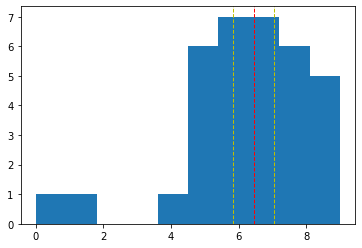

In [78]:
import matplotlib.pyplot as plt
plt.hist(data)
plt.axvline(s, color='r', linestyle='dashed', linewidth=1)
plt.axvline(r, color='y', linestyle='dashed', linewidth=1)
plt.axvline(l, color='y', linestyle='dashed', linewidth=1)

### 6. Принадлежит ли выборка data_1 и data_2 одному множеству? Оцените это с помощью известных вам тестов проверки гипотез.

In [28]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

t, p = stats.ttest_ind(data_1 ,data_2)

print('t=%.3f, p=%.15f' % (t, p))
if p < 0.001:
    print('Различия существенны')
else:
    print('Различия несущественны')

t=7.357, p=0.000000000021159
Различия существенны


Значение p-value очень близко к нулю. Значит, выборки имеют мало общего.

На гистограммах распределения тоже выглядят совсем по-разному.

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

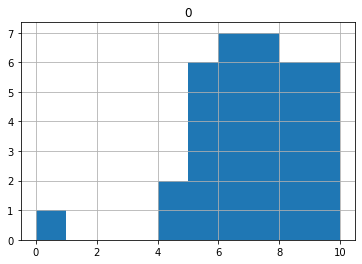

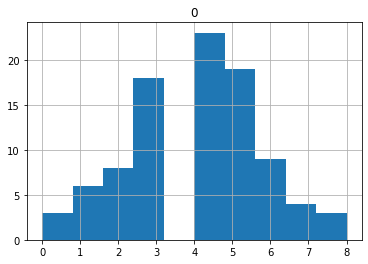

In [35]:
pd.DataFrame(data_1).hist(bins=10)
pd.DataFrame(data_2).hist(bins=10)

### 7. На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

### Предположим, Вы сформировали две гипотезы: Нулевая гипотеза - распределение нормальное,  Альтернативная гипотеза - распределение не нормальное.


### Допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости (p-value) = 0.03. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет? Вопрос без подвоха)

**Ответ**: Значение p-value достаточно низкое. Если, как в большинстве примеров, принять уровень значимости — 5%, мы можем отклонить нулевую гипотезу и считать, что различия между выборками существенны.

Значит наше распределение нельзя считать нормальным.

### 8. Первая выборка — это пациенты, которых лечили препаратом А.  Вторая выборка — пациенты, которых лечили препаратом Б. Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

#### а) Требуется выяснить, имеется ли значимое различие эффективности препаратов А и Б, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (уровень значимости принять за 5% или 0.05)

#### b) При каком минимальном P-values различия были бы уже значимы? 

In [33]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-1.25,size=300)

#Ваш код:
t,p = stats.ttest_ind(a=A,b=B,equal_var=False)
print('t=%.3f, p=%.3f' % (t, p))
if p < 0.05:
    print('Различия существенны')
else:
    print('Различия несущественны')

t=0.332, p=0.740
Различия несущественны


Достаточно большое (74%) значение p-value не позволяет нам отвергнуть нулевую гипотезу и считать различия существенными. Гистограммы выборок, хотя и немного отличаются, в целом выглядят весьма похоже.

Различия были бы значимы при p-value меньше 0.05. Максимальное значение p-value, при котором различия можно было бы считать значимыми — 0.04(9).

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

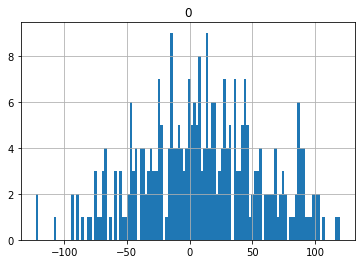

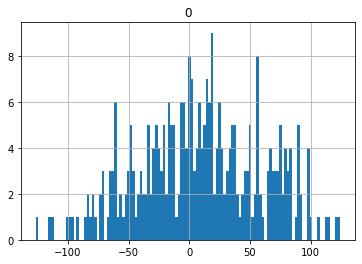

In [36]:
pd.DataFrame(A).hist(bins=120)
pd.DataFrame(B).hist(bins=120)